In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits
import healpy as hp

In [3]:
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
hplanck=6.626068e-34 #MKS
TCMB = 2.72548 #Kelvin
d2r = np.pi / 180.

In [4]:
lonc = 107.2
latc = 5.2
lonra = [lonc-2., lonc+2.]
latra = [latc-2., latc+2.]

In [9]:
dwingeloo = hp.read_map('../externaldata/Dwingeloo_1_256_Kelvins.fits', verbose=False)
#dwingeloo = hp.ud_grade(dwingeloo, 512)

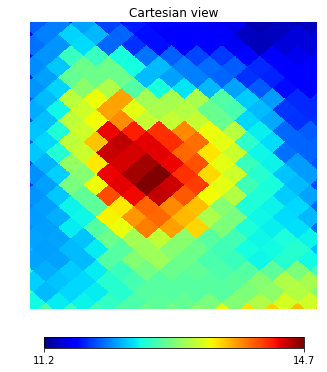

In [10]:
hp.cartview(dwingeloo, lonra=lonra, latra=latra)

In [16]:
x = np.copy(dwingeloo)
nside = hp.get_nside(x)
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, (60./60.)*d2r)
amaskout = set(hp.query_disc(nside, vecc, (100./60.)*d2r))
amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r))
amask = np.array(list(amaskout.difference(amaskin)))

In [17]:
nu = 820.e6
kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * hp.nside2pixarea(nside) * 1.e26
y = x * kthermo_to_intensity
rdata = y[rmask]
adata = y[amask]
print np.sum(rdata - np.median(adata))
print np.std(adata) * np.sqrt(len(rdata) + pi/2. * float(len(rdata)**2) / len(adata))

26.1767874409
1.60179929168
